# Prosper Loans Data Exploration

## Preliminary Wrangling

This document explores a dataset containing information on loans from Prosper Funding LLC (the first peer-to-peer lending marketplace in the United States). This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income range, Prosper Score  and many others. Since the Prosper Score is applicable for loans that originated after July 2009, I will be using only the data from July 2009.

In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [45]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [46]:
#pd.set_option('display.max_columns', None)

In [47]:
# high-level overview of data shape and composition
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [48]:
df.shape

(113937, 81)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [50]:
# descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [51]:
df['LoanOriginationDate'].unique()

array(['2007-09-12 00:00:00', '2014-03-03 00:00:00',
       '2007-01-17 00:00:00', ..., '2009-07-23 00:00:00',
       '2008-10-17 00:00:00', '2005-11-15 00:00:00'], dtype=object)

# data wrangling, removing loans with inconsistent or missing data.

1> ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate columns are of Object datatype. These columns should be converted to datetime datatype instead of object datatype.

2> Lot of columns have missing values.

3> ListingNumber, LoanNumber should be Object datatype instead of int.

4> Duplicate Listing Numbers. Dropping duplicates - Keeping ones with max Prosper score.

5> Since Prosper Scores fall in the range of 1 and 10, dropping rows where the Prosper Score is 11.

In [52]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'], format='%Y-%m-%d %H:%M:%S.%f')

In [53]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'], format='%Y-%m-%d %H:%M:%S')

In [54]:
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'], format='%Y-%m-%d %H:%M:%S.%f')

In [55]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

In [56]:
df['ListingNumber'] = df['ListingNumber'].astype(str)
df['LoanNumber'] = df['LoanNumber'].astype(str)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  object        
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [58]:
pd.to_datetime(df.ListingCreationDate).min(), pd.to_datetime(df.ListingCreationDate).max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

In [59]:
#Dropping duplicate records for Listings
df.sort_values(by=['ListingNumber', 'ProsperScore'], inplace=True)
df.drop_duplicates(subset=['ListingNumber'],keep='last', inplace=True)

In [60]:
df.shape

(113066, 81)

In [61]:
df.ProsperScore.value_counts()

4.0     12423
6.0     12174
8.0     11988
7.0     10511
5.0      9737
3.0      7517
9.0      6884
2.0      5659
10.0     4716
11.0     1456
1.0       917
Name: ProsperScore, dtype: int64

In [62]:
len(df.ProsperScore), df['ProsperScore'].isnull().sum()

(113066, 29084)

In [166]:
#Since Prosper Scores fall in the range of 1 and 10, dropping rows where the Prosper Score is 11.
df.drop(index=df[df.ProsperScore == 11.0].index, inplace=True)

In [64]:
df.Occupation.value_counts().index

Index(['Other', 'Professional', 'Computer Programmer', 'Executive', 'Teacher',
       'Administrative Assistant', 'Analyst', 'Sales - Commission',
       'Accountant/CPA', 'Clerical', 'Sales - Retail', 'Skilled Labor',
       'Retail Management', 'Nurse (RN)', 'Construction', 'Truck Driver',
       'Laborer', 'Police Officer/Correction Officer', 'Civil Service',
       'Engineer - Mechanical', 'Military Enlisted', 'Food Service Management',
       'Food Service', 'Medical Technician', 'Engineer - Electrical',
       'Attorney', 'Tradesman - Mechanic', 'Social Worker', 'Postal Service',
       'Professor', 'Realtor', 'Nurse (LPN)', 'Nurse's Aide', 'Doctor',
       'Tradesman - Electrician', 'Waiter/Waitress', 'Fireman', 'Scientist',
       'Military Officer', 'Bus Driver', 'Principal', 'Teacher's Aide',
       'Pharmacist', 'Student - College Graduate Student', 'Landscaping',
       'Engineer - Chemical', 'Investor', 'Architect', 'Clergy',
       'Pilot - Private/Commercial', 'Student -

In [65]:
df.LoanStatus.value_counts()

Current                   54311
Completed                 38030
Chargedoff                11992
Defaulted                  5017
Past Due (1-15 days)        799
Past Due (31-60 days)       361
Past Due (61-90 days)       310
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      200
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [66]:
# convert Loan Status, and Income Range into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Current', 'FinalPaymentInProgress', 'Completed', 'Past Due (1-15 days)',
                                   'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
                                   'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted'],
                    'IncomeRange': ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Things to Explore:

1> Time between ListingCreationDate & LoanOriginationDate

2> Percentage of loans closed - LoanStatus

3> Rates paid by Borrowers - Borrower Rate

4> Loans taken for what purpose - ListingCategory

5> Number of loans made in each year

6> How many friends have invested - InvestmentFromFriendsCount

7> Loans made for different ProsperScores (custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.) - ProsperScore

8> Loans made by state - BorrowerState

9> Borrower information at the time of listing - Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome 

### What is the structure of your dataset?


The data consists of information on loans from Prosper Funding LLC (the first peer-to-peer lending marketplace in the United States). This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I performed some data wrangling in order to clean the data and the count of rows has been reduced to 82,574 loans.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are the best predictors of bad loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the Credit Score and Prosper Score will be the strongest predictor of loan defaults, the lower the Credit score/Prosper Score, higher the chance of defaults. I also think that the borrower's employment status duration, whether borrower is a homeowner and whether the Borrower's Income is verifiable will have effects on the loan status, though to a much smaller degree than the main effect of Prosper Score.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Loan Status

> Distribution of Loans by Loan Status.

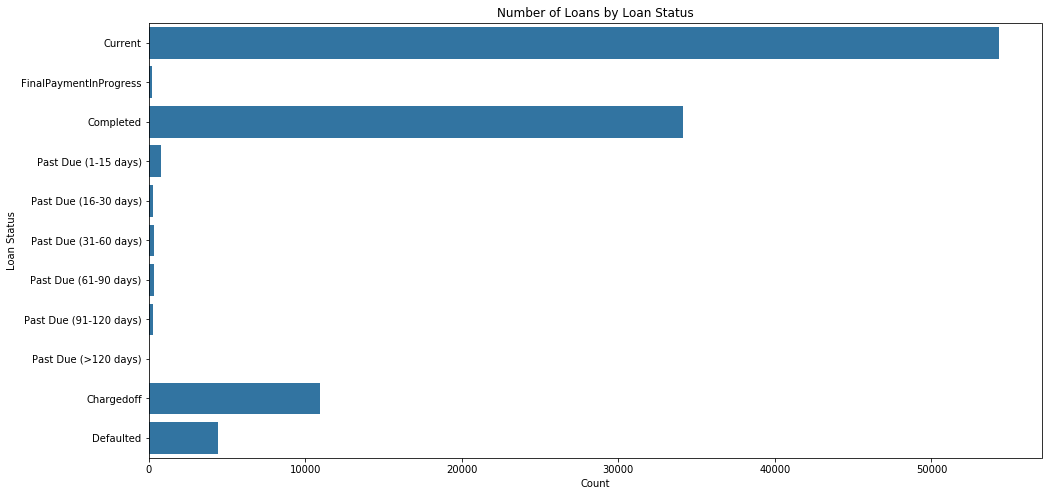

In [87]:
# start with a standard-scaled plot
status_items = df['LoanStatus'].value_counts()
total = df.shape[0]

plt.figure(figsize=[16, 8]);
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df, y = 'LoanStatus', color = base_color);
plt.xlabel('Count');
plt.ylabel('Loan Status');
plt.title('Number of Loans by Loan Status');

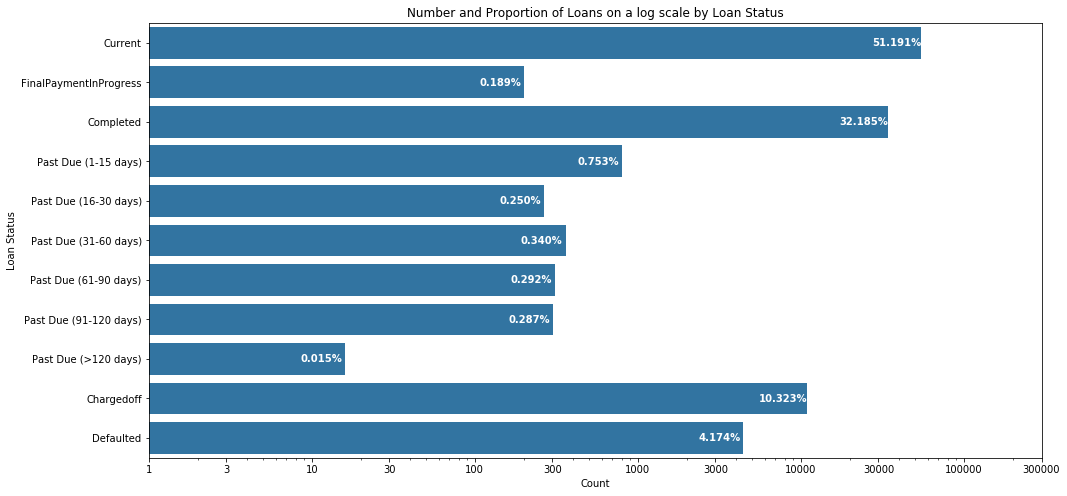

In [88]:
# there's a long tail in the distribution, so let's put it on a log scale instead

status_items = df['LoanStatus'].value_counts()
total = df.shape[0]

plt.figure(figsize=[16, 8]);
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df, y = 'LoanStatus', color = base_color);
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Count');
plt.ylabel('Loan Status');
status_counts_name = status_items.index
rects = ax.patches
texts = ['{:0.3f}%'.format(100*status_items[i]/total) for i in range(status_items.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width/1.4, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', ha='center', va='center')

plt.title('Number and Proportion of Loans on a log scale by Loan Status');
plt.show()

#### Above plot shows that almost 50% loans are current, a little over 34% are completed or close to completion, a little under 2% of the loans are past due in payment, about 10.75% have been charged off and aout 4.5% of the loans are defaulted.

#### I will be studying the Charged Off and Defaulted loans for various attributes to see if I can find any patterns.

> Plot of Loans by State.

In [69]:
#Checking for missing states data
df['BorrowerState'].isnull().sum()

5515

In [70]:
df.shape

(111610, 81)

In [71]:
#Dropping rows where BorrowerState is null.
df = df.drop(index=df[df['BorrowerState'].isnull()].index)

In [72]:
df.shape

(106095, 81)

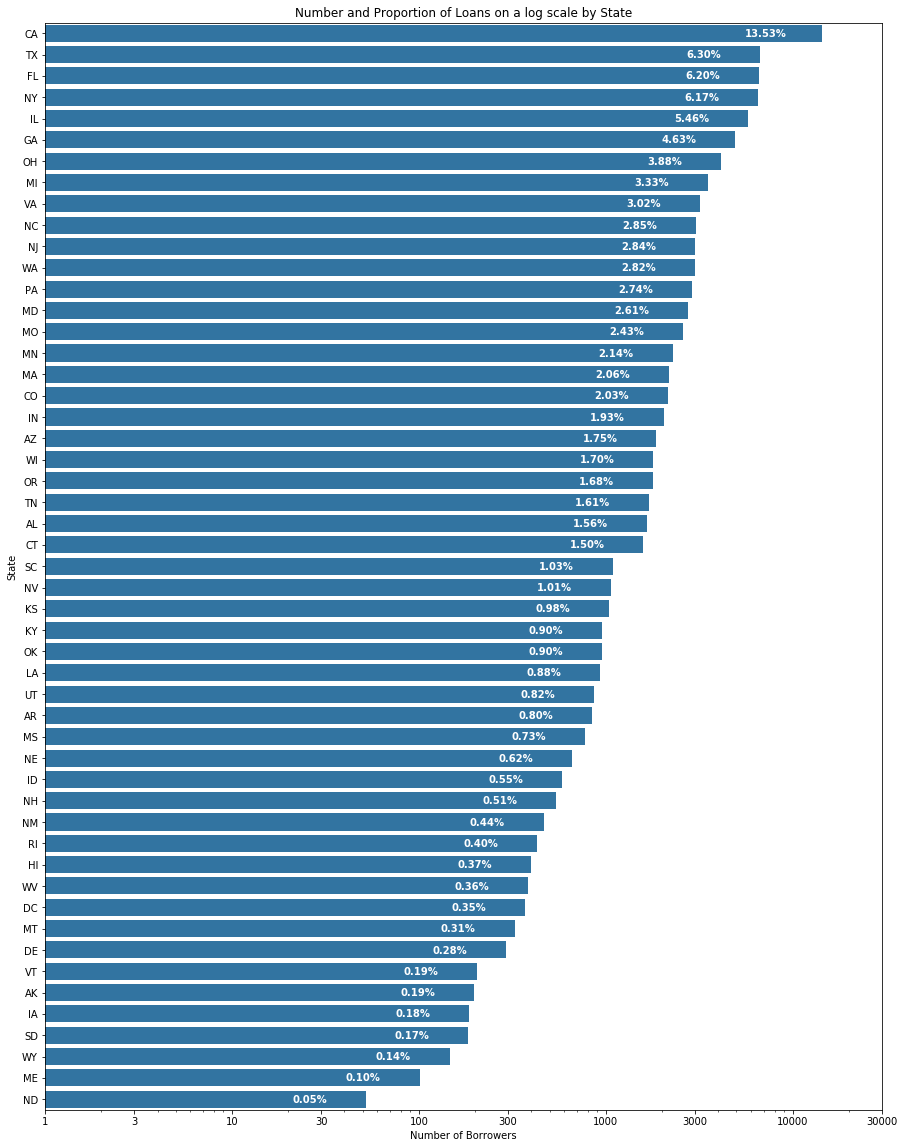

In [89]:
plt.figure(figsize=[15, 20]);
base_color = sb.color_palette()[0]
#ax = sb.countplot(data = df, y = 'BorrowerState', order=np.sort(df['BorrowerState'].value_counts().index), color = base_color);
ax = sb.countplot(data = df, y = 'BorrowerState', order=df['BorrowerState'].value_counts(ascending=False).index, color = base_color);
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Number of Borrowers');
plt.ylabel('State');

borrower_state = df['BorrowerState'].value_counts(ascending=False).values
borrower_total = borrower_state.sum()

rects = ax.patches
texts = ['{:0.2f}%'.format(100*borrower_state[i]/borrower_total) for i in range(borrower_state.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width/2, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', ha='center', va='center')

plt.title('Number and Proportion of Loans on a log scale by State');

> Maximum number of loans are made in California, followed by Texas, Florida and New York.

> Combining loans into fewer buckets 
* "Active"('Current'), 
* "Completed"('FinalPaymentInProgress' and 'Completed'), 
* "Delinquent"(All the 'Past Due' loans), 
* "Chargedoff"('Chargedoff'), 
* "Defaulted"('Defaulted')
* Ignoring 'Cancelled' loans since they repesent only 0.002% of the data. (Deleting loans with 'Cancelled' status).

In [74]:
#Deleting loans with 'Cancelled' status
df = df.drop(index=df[df['LoanStatus'] == 'Cancelled'].index)

In [75]:
df['loan_status_cond'] = 'Delinquent'
df.loc[(df['LoanStatus'] == 'Current'), 'loan_status_cond'] = 'Active'
df.loc[(df['LoanStatus'].isin(['FinalPaymentInProgress', 'Completed'])), 'loan_status_cond'] = 'Completed'
df.loc[(df['LoanStatus'] == 'Chargedoff'), 'loan_status_cond'] = 'Chargedoff'
df.loc[(df['LoanStatus'] == 'Defaulted'), 'loan_status_cond'] = 'Defaulted'

> Plotting Proportion of Charged Off, Delinquent and Defaulted Loans compared to all the loans made in a State.

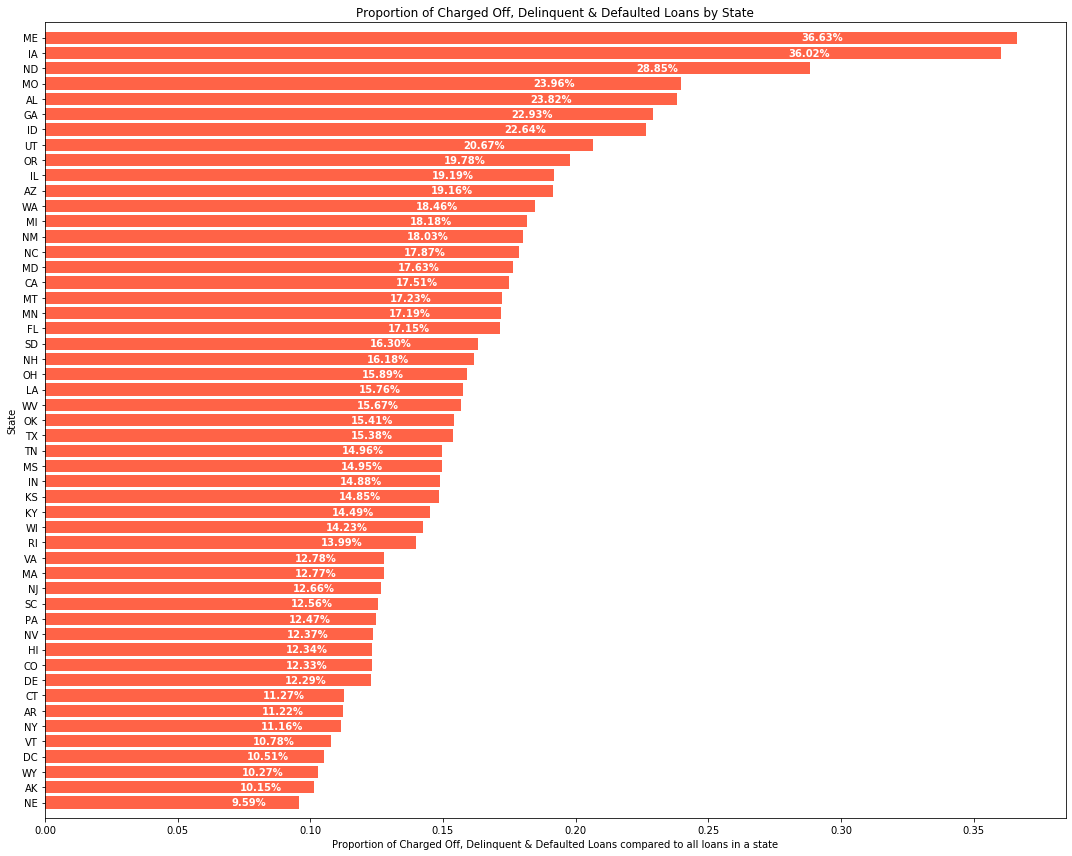

In [91]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

state_dict = {}
keys = df['BorrowerState'].value_counts().index

for i in keys:
    state_dict[i] = df[(df['loan_status_cond'].isin(['Defaulted', 'Chargedoff', 'Delinquent'])) & (df['BorrowerState']==i)]['BorrowerState'].count()/df[df['BorrowerState']==i]['BorrowerState'].count()

sorted_list = sorted(state_dict.items(), key=lambda x: x[1], reverse=False)

y = []
lengths = []

for i in range(len(sorted_list)):
    y.append(sorted_list[i][0])
    lengths.append(sorted_list[i][1])

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y, lengths, color='tomato');
ax.set_xlabel('Proportion of Charged Off, Delinquent & Defaulted Loans compared to all loans in a state');
ax.set_ylabel('State');
ax.set_ylim(-1, 51);

rects = ax.patches
texts = ['{:0.2f}%'.format(100*lengths[i]) for i in range(len(lengths))]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width-width/5, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', 
            ha='center', va='center')

plt.title('Proportion of Charged Off, Delinquent & Defaulted Loans by State');
fig.tight_layout()
plt.show()

##### Whoa! 36% of the loans made in Maine and Iowa are in trouble, followed closely by North Dakota at 28%! Luckily Prosper makes fewer loans in these states overall.


> Let's look at the distribution of 'In Trouble' loans ('Defaulted', 'Chargedoff' & 'Delinquent') in the top 5 states where Prosper makes the largest number of loans (California, Texas, Florida, New York and Illinois)

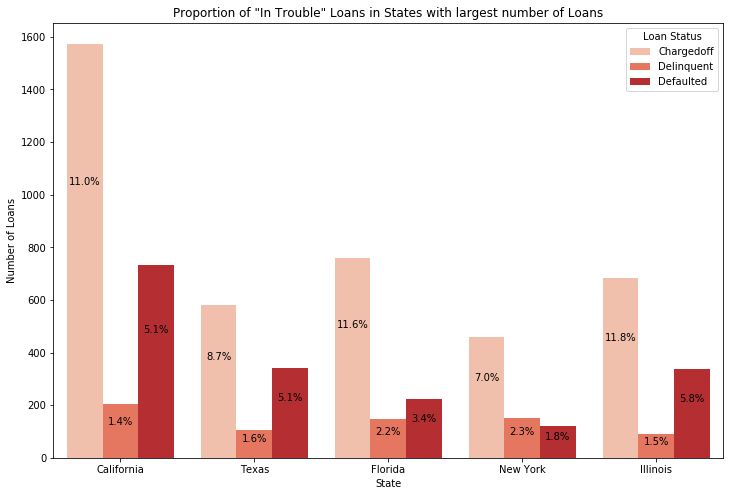

In [92]:
top_states = df[(df['BorrowerState'].isin(['CA', 'TX', 'FL', 'NY', 'IL'])) & (df['loan_status_cond'].isin(['Defaulted', 'Chargedoff', 'Delinquent']))]
plt.figure(figsize=[12, 8]);
ax = sb.countplot(data = top_states, x = 'BorrowerState', order=['CA', 'TX', 'FL', 'NY', 'IL'], hue='loan_status_cond', palette = 'Reds');
plt.legend(title='Loan Status', loc='best');
plt.xlabel('State');
plt.ylabel('Number of Loans');
plt.xticks([0,1,2,3,4], ['California', 'Texas', 'Florida', 'New York', 'Illinois']);

state = ['CA', 'TX', 'FL', 'NY', 'IL']
status = ['Chargedoff', 'Delinquent', 'Defaulted']
prop = []

for stat in status:
    for st in state:
        st_total = df[df['BorrowerState'] == st]['ListingNumber'].count()
        prop.append(df[(df['BorrowerState'] == st) & (df['loan_status_cond'] == stat)]['ListingNumber'].count()/st_total)

rects = ax.patches
texts = ['{:0.1f}%'.format(100*prop[i]) for i in range(len(prop))]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(rect.get_x()+width/2, rect.get_y()+rect.get_height()/1.5, text, color='black', 
            ha='center', va='center')
    
plt.title('Proportion of "In Trouble" Loans in States with largest number of Loans');
plt.show()

#### This chart tells us that the proportion of "In Trouble" loans is pretty high in the states where Prosper makes the largest number of loans too.

> Plot for Loans made in different years

In [93]:
df['ListingCreationDate'].isnull().sum()

0

In [94]:
listings_by_year = df.groupby(df['ListingCreationDate'].dt.year)['ListingNumber'].count()

In [95]:
total = df['ListingCreationDate'].count()

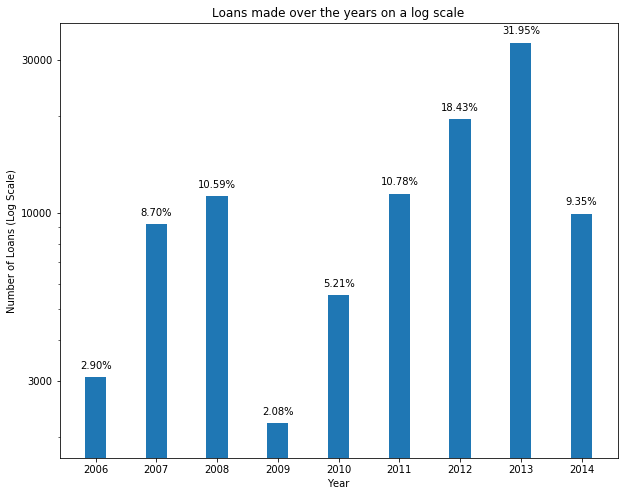

In [97]:
width = 0.35
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
plt.yscale('log');
x_ticks = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
plt.xticks(x_ticks, x_ticks);
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.yticks(y_ticks, y_ticks);
plt.xlabel('Year');
plt.ylabel('Number of Loans (Log Scale)');
rects = ax.bar(listings_by_year.index, listings_by_year.values, width);
texts = ['{:0.2f}%'.format(100*listings_by_year.iloc[i]/total) for i in range(listings_by_year.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, text, ha='center', va='bottom');
plt.title('Loans made over the years on a log scale');
plt.show()

#### The data suggests that the least number of loans were made in 2009, at the height of the great recession and maximum number of loans were made in 2013 as the recovery was underway.

> Now plotting the number of loans by year and loan status using a stacked bar chart

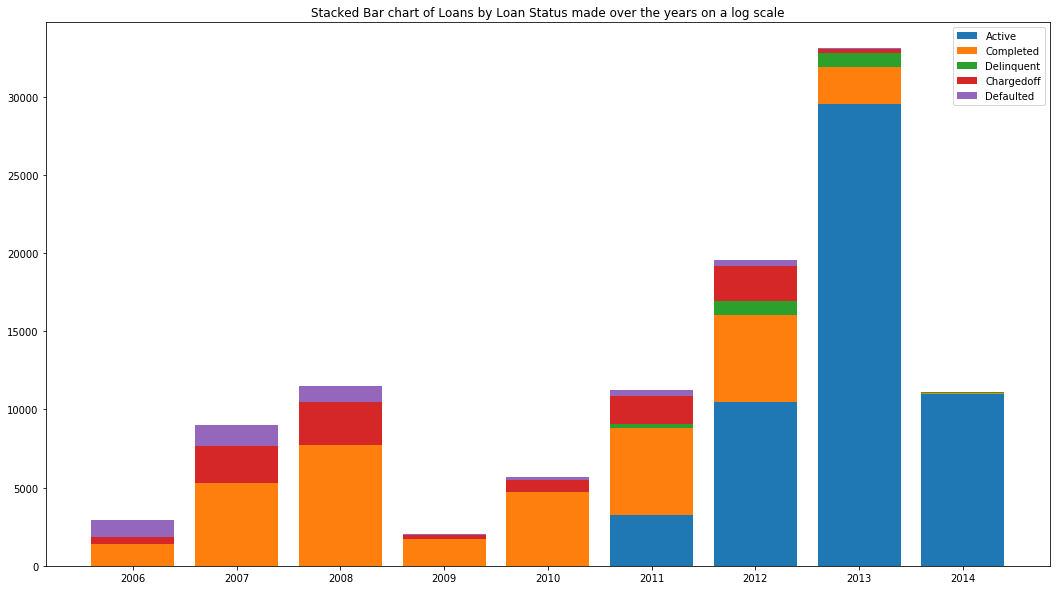

In [99]:
cat1_order = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
cat2_order = ['Active','Completed','Delinquent','Chargedoff','Defaulted']

listings_by_year = df.groupby(df['ListingCreationDate'].dt.year)['ListingNumber'].count()

plt.figure(figsize = [18, 10])

plt.subplot(1, 1, 1)

baselines = np.zeros(len(cat1_order))

for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    inner_counts = df[df['loan_status_cond'] == cat2]['LoanOriginationDate'].dt.year.value_counts()
    for yr in cat1_order:
        if yr in inner_counts.index:
            continue
        else:
            inner_counts[yr] = 0
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines);
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order);

plt.title('Stacked Bar chart of Loans by Loan Status made over the years on a log scale');
plt.show()

#### A larger proportion of Charged Off & Defaulted loans are observed from 2006 through 2008

> Next we will study the loans distribution by the categories for which the borrowers said they were taking the loans.

In [101]:
listingcategory = pd.Series(['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'])

In [102]:
listingcategory_val = df.groupby(df['ListingCategory (numeric)'])['ListingNumber'].count()

In [103]:
total = df['ListingNumber'].count()

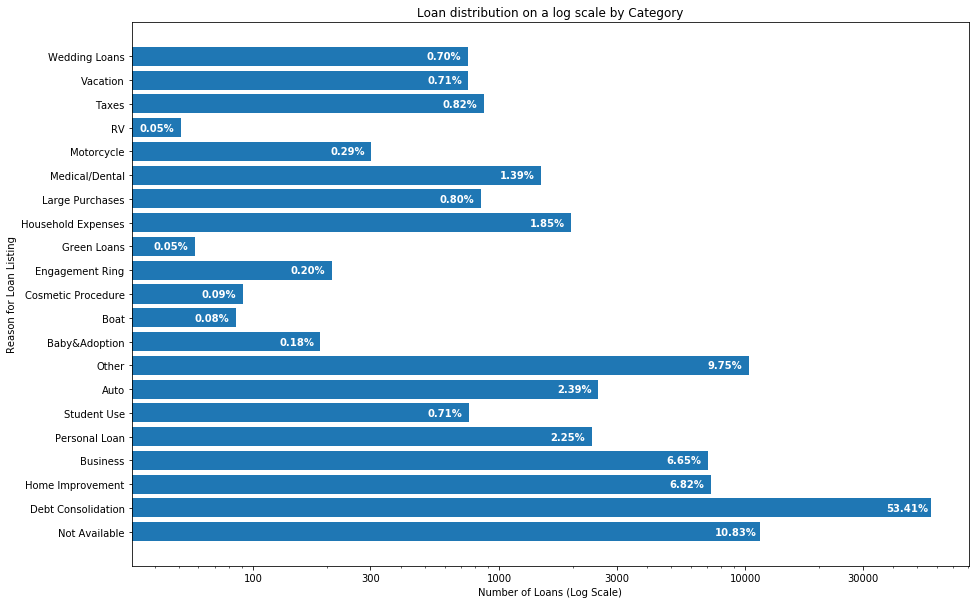

In [104]:
width = 0.8
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(x_ticks, x_ticks);
plt.ylabel('Reason for Loan Listing');
plt.xlabel('Number of Loans (Log Scale)');
rects = ax.barh(listingcategory.values, listingcategory_val.values, width);

texts = ['{:0.2f}%'.format(100*listingcategory_val.iloc[i]/total) for i in range(listingcategory_val.shape[0])]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width-width/5, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', 
            ha='center', va='center')

plt.title('Loan distribution on a log scale by Category');
plt.show()

#### Over 50% of the loans were taken out for consolidating debt.

> Next we will see if the borrower being a homeowner is of significance.

In [105]:
# Check if borrower is a home owner
df.IsBorrowerHomeowner.value_counts()

True     54371
False    51724
Name: IsBorrowerHomeowner, dtype: int64

#### Since the data is almost evenly split between homeowners and non-homeowners, let's plot the Loan Status by home ownership.

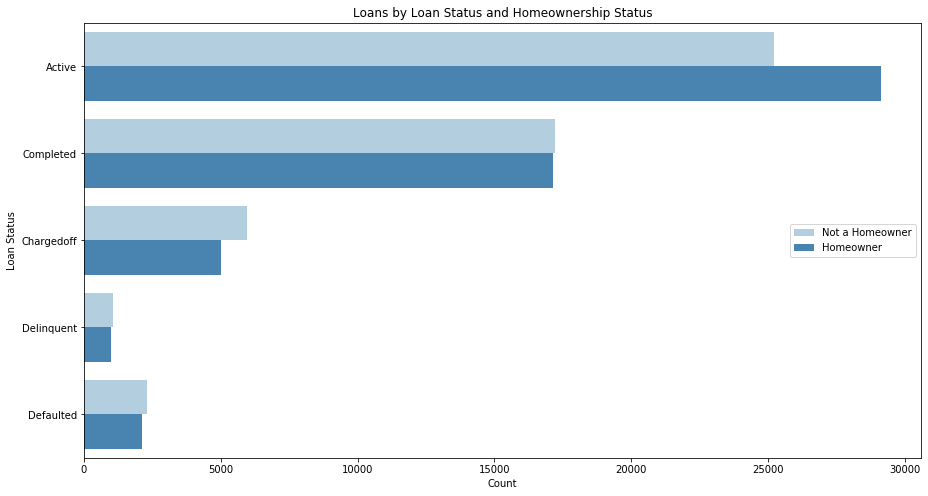

In [106]:
plt.figure(figsize=[15, 8]);
ax = sb.countplot(data = df, y = 'loan_status_cond', hue='IsBorrowerHomeowner', palette = 'Blues');
plt.xlabel('Count');
plt.ylabel('Loan Status');
plt.legend(['Not a Homeowner','Homeowner'], title='', loc='center right');
plt.title('Loans by Loan Status and Homeownership Status');
plt.show()

#### Slightly greater loans of non-homeowners are "In Trouble" but the difference between Homeowners vs Non-Homeowners is not very significant.

> Next we will see if the borrower's income being verifiable is of significance.

In [107]:
# Check if Income Verifiable
df.IncomeVerifiable.value_counts()

True     97683
False     8412
Name: IncomeVerifiable, dtype: int64

In [109]:
ver_inc_true_total = df[df['IncomeVerifiable'] == True]['loan_status_cond'].count()
ver_inc_false_total = df[df['IncomeVerifiable'] == False]['loan_status_cond'].count()
total = df['ListingNumber'].count()

In [117]:
# Plotting the proportion of loans for various Loan Statuses based on the Income Verifiable flag.
s1 = pd.Series(df[df['IncomeVerifiable'] == True]['loan_status_cond'].value_counts()/ver_inc_true_total, name='s1')
s2 = pd.Series(df[df['IncomeVerifiable'] == False]['loan_status_cond'].value_counts()/ver_inc_false_total, name='s2')

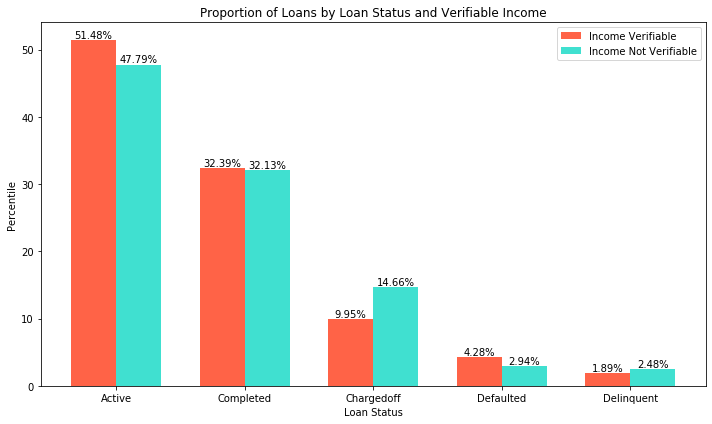

In [118]:
x = np.arange(len(s1.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6));
rects1 = ax.bar(x - width/2, s1.values*100, width, label='Income Verifiable', color='tomato');
rects2 = ax.bar(x + width/2, s2.values*100, width, label='Income Not Verifiable', color='turquoise');

ax.set_ylabel('Percentile')
ax.set_title('Proportion of Loans by Loan Status and Verifiable Income')
ax.set_xticks(x)
ax.set_xticklabels(s1.index)
ax.set_xlabel('Loan Status')
ax.legend();

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    color='black',
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### Proportion of "Charged Off" and "Delinquent" loans for "Not Verifiable Income" loans is greater than those for "Verifiable Income" loans. Surprisingly there are a greater proportion of "Income Verified" Defaulted loans than "Income Not Verified" Defaulted loans.

> Next we will see plot of the borrower's credit scores.

In [121]:
df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].describe()

,CreditScoreRangeLower,CreditScoreRangeUpper
count,106095.000000,106095.000000
mean,688.024129,707.024129
std,62.847706,62.847706
min,0.000000,19.000000
25%,660.000000,679.000000
50%,680.000000,699.000000
75%,720.000000,739.000000
max,880.000000,899.000000


In [120]:
df.shape

(106095, 82)

In [131]:
#Dropping rows where the Credit Score in the lower range is zero and the Credit Score in the upper range is 19.
df.drop(index = df[(df['CreditScoreRangeLower'] <= 0) | (df['CreditScoreRangeUpper'] <= 19)].index, inplace=True)

In [123]:
df.shape

(106006, 82)

In [129]:
# Adding a calculated Credit Score column to get the average credit score of the borrower.
df['creditScore_calculated'] = np.ceil((df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2)

In [125]:
df['creditScore_calculated'].describe()

count    106006.000000
mean        698.601777
std          59.626983
min         430.000000
25%         670.000000
50%         690.000000
75%         730.000000
max         890.000000
Name: creditScore_calculated, dtype: float64

In [130]:
#Dropping rows where the calculated Credit Score is greater than 850
df[(df['creditScore_calculated'] > 850)].index

Int64Index([], dtype='int64')

In [132]:
#Checking if Credit Score is null
df['creditScore_calculated'].isnull().values.any()

False

In [134]:
#Dropping rows where Credit Score is greater than 850
df.drop(index = df[(df['creditScore_calculated'] > 850)].index, inplace=True)

> Plotting distribution of Borrower's Credit Scores

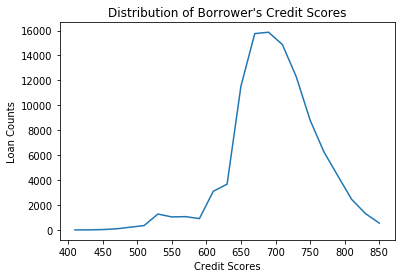

In [143]:
bin_edges = np.arange(400, 870, 20)

credscore_binned = pd.cut(df['creditScore_calculated'], bin_edges, include_lowest=True)

credscore_cnt = df['ListingKey'].groupby(credscore_binned).count()
plt.errorbar(x=bin_centers, y=credscore_cnt);
plt.xlabel('Credit Scores');
plt.ylabel('Loan Counts');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.title('Distribution of Borrower\'s Credit Scores');
plt.show()

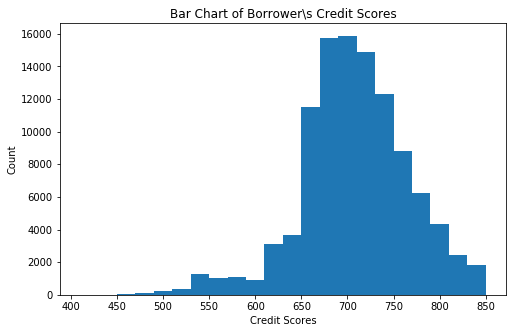

In [141]:
bin_edges = np.arange(410, 870, 20)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'creditScore_calculated', bins = bin_edges);
plt.xlabel('Credit Scores');
plt.ylabel('Count');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.title('Bar Chart of Borrower\s Credit Scores');

#### Maximum number of borrowers have Credit Scores in the range of 650-750.

> Plotting distribution of Prosper Scores

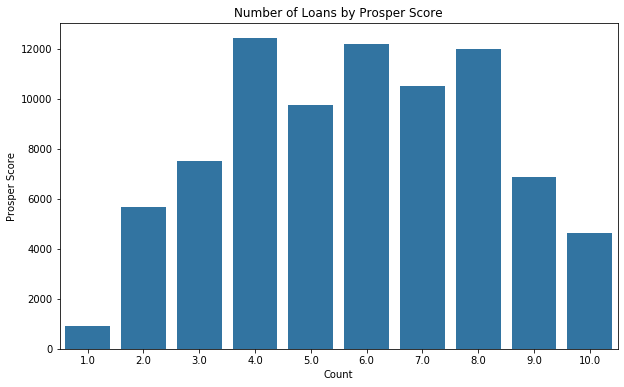

In [149]:
plt.figure(figsize=[10, 6]);
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df, x = 'ProsperScore', color = base_color);
plt.xlabel('Count');
plt.ylabel('Prosper Score');
plt.title('Number of Loans by Prosper Score');

> Maximum number of Loans have Prosper Scores of 4, 6 and 8.

> Distribution of loans by borrower's Homeownership status

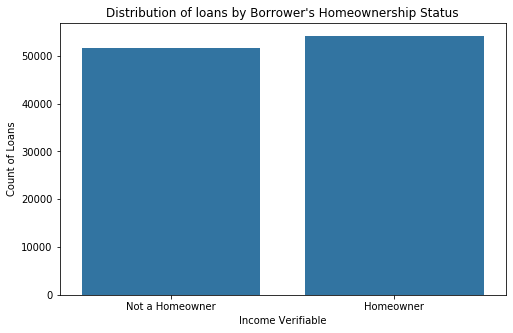

In [157]:
plt.figure(figsize=[8, 5]);
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color);
plt.ylabel('Count of Loans');
plt.xlabel('Income Verifiable');
plt.xticks([0,1],['Not a Homeowner','Homeowner']);
plt.title('Distribution of loans by Borrower\'s Homeownership Status');

#### The loans are divided almost equally between Homeowners and non-Homeowners.

> Plotting Prosper Score by borrower's homeownership status

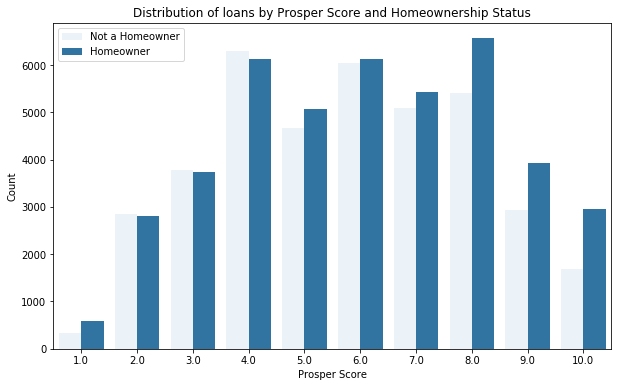

In [156]:
plt.figure(figsize=[10, 6]);
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperScore', hue='IsBorrowerHomeowner',  color = base_color);
plt.ylabel('Count');
plt.xlabel('Prosper Score');
plt.legend(['Not a Homeowner','Homeowner'], title='', loc='upper left');
plt.title('Distribution of loans by Prosper Score and Homeownership Status');

#### Loans are pretty evenly distributed between Homeowners and non-Homeowners, except for Prosper Scores of 1, 8, 9 and 10 where Homeowners have a greater number of loans.

> Distribution of loans by borrower's Income verifiability status

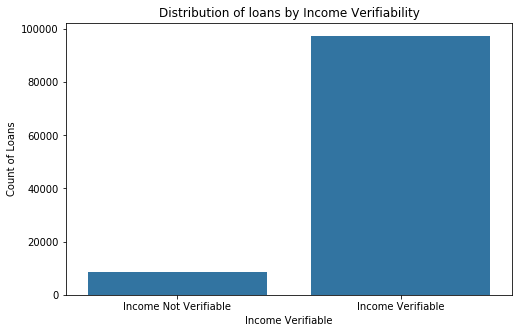

In [158]:
plt.figure(figsize=[8, 5]);
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IncomeVerifiable', color = base_color);
plt.ylabel('Count of Loans');
plt.xlabel('Income Verifiable');
plt.xticks([0,1],['Income Not Verifiable','Income Verifiable']);
plt.title('Distribution of loans by Income Verifiability');

#### A much greater proportion of loans are made to borrowers with verifiable income and to borrowers whose incomes are not verifiable.

> Plotting Prosper Score by borrower's income verifiability status

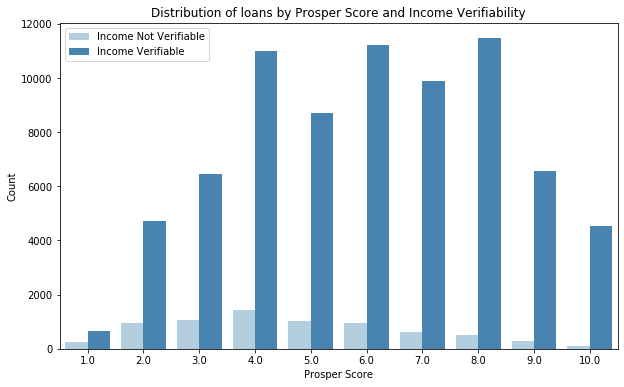

In [152]:
plt.figure(figsize=[10, 6]);
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperScore', hue='IncomeVerifiable',  palette = 'Blues');
plt.ylabel('Count');
plt.xlabel('Prosper Score');
plt.legend(['Income Not Verifiable','Income Verifiable'], title='', loc='upper left');
plt.title('Distribution of loans by Prosper Score and Income Verifiability');

#### Distribution of "Not Verifiable Income" loans is slightly skewed to the right. 

> Let's see plot of proportion of loans as well as number of loans by Loan Status and Credit Scores in the next 2 plots.

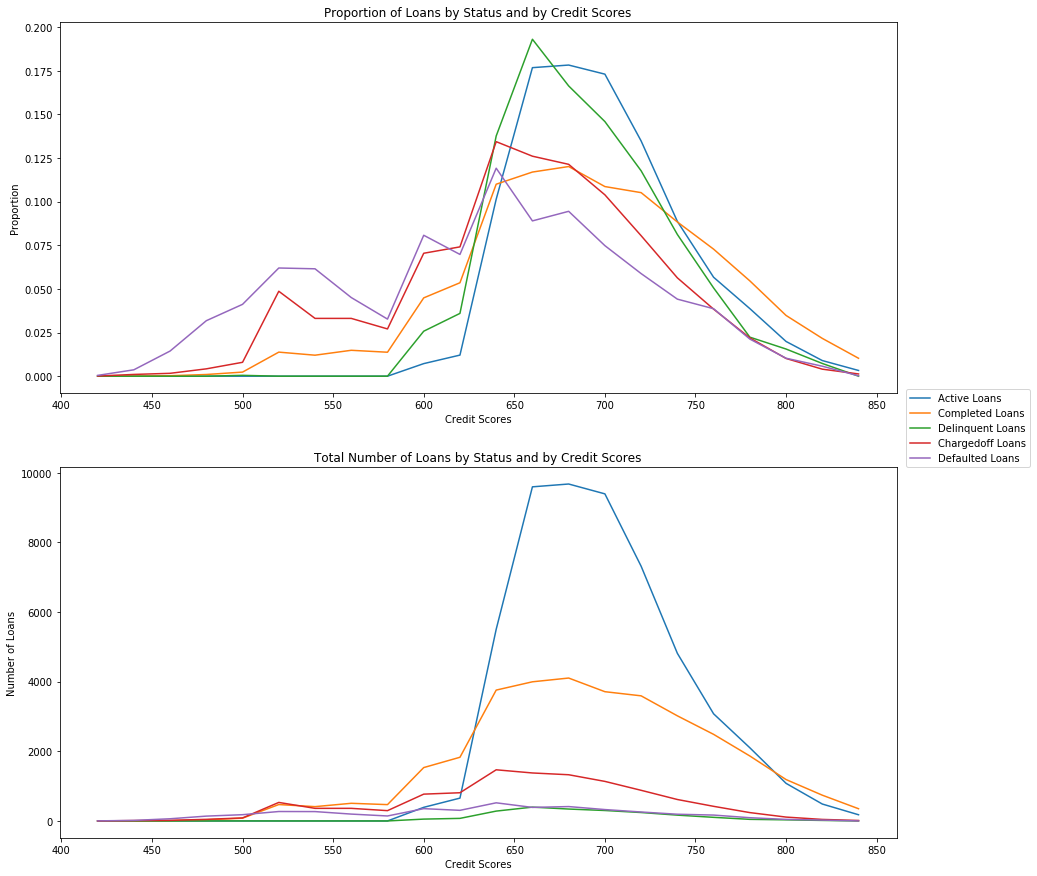

In [159]:
#Checking for the different types of Loan statuses based on credit scores.
bin_edges = np.arange(410, 870, 20)

bin_centers = bin_edges[:-1]+10

credscore_binned = pd.cut(df['creditScore_calculated'], bin_edges, include_lowest=True)

stat_order = ['Active','Completed','Delinquent','Chargedoff','Defaulted']

loan_sts_cnt = df.groupby([credscore_binned, df['loan_status_cond']])['loan_status_cond'].count().groupby(level=1)

plt.figure(figsize = [15, 15])
plt.subplot(2, 1, 1)
for stat in stat_order:
    stat_str = stat
    stat = loan_sts_cnt.get_group(stat)
    total_loans = df[df['loan_status_cond'] == stat_str]['loan_status_cond'].count()
    stat_prop = stat/total_loans    
    plt.errorbar(x=bin_centers, y=stat_prop, label=stat_str+' Loans');
plt.xlabel('Credit Scores');
plt.ylabel('Proportion');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.title('Proportion of Loans by Status and by Credit Scores');
plt.subplot(2, 1, 2)

for stat in stat_order:
    stat_str = stat
    stat = loan_sts_cnt.get_group(stat)
    plt.errorbar(x=bin_centers, y=stat, label=stat_str+' Loans');

plt.xlabel('Credit Scores');
plt.ylabel('Number of Loans');
x_ticks = [400,450,500,550,600,650,700,750,800,850]
plt.xticks(x_ticks);
plt.title('Total Number of Loans by Status and by Credit Scores');
plt.legend(bbox_to_anchor=(1.16, 1), loc='lower right', borderaxespad=0.);

> Unsurprisingly, the data shows proportionally more "In Trouble" loans for credit scores that are considered "Bad" (below 700)

In [167]:
# Dropping rows where Prosper Score is null
df.drop(index=df[df['ProsperScore'].isnull() == True].index, inplace=True)

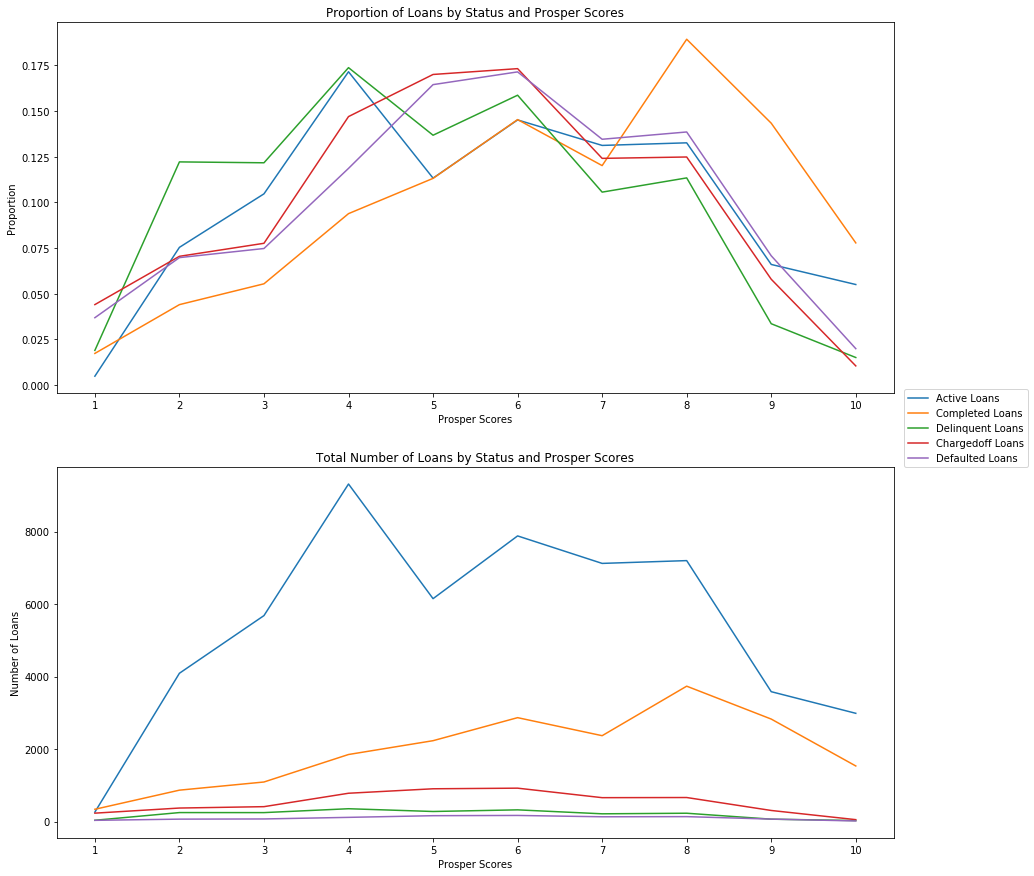

In [187]:
#Checking for the different types of Loan statuses based on Prosper Scores.
stat_order = ['Active','Completed','Delinquent','Chargedoff','Defaulted']

bin_centers = np.sort(df['ProsperScore'].unique())

prosper_score_cnt = df.groupby([df['ProsperScore'], df['loan_status_cond']])['ProsperScore'].count().groupby(level=1)

plt.figure(figsize = [15, 15])
plt.subplot(2, 1, 1)
for stat in stat_order:
    stat_str = stat
    stat = prosper_score_cnt.get_group(stat)
    total_loans = df[df['loan_status_cond'] == stat_str]['ProsperScore'].count()
    stat_prop = stat/total_loans    
    plt.errorbar(x=bin_centers, y=stat_prop, label=stat_str+' Loans');
plt.xlabel('Prosper Scores');
plt.ylabel('Proportion');
x_ticks = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x_ticks);
plt.title('Proportion of Loans by Status and Prosper Scores');
plt.subplot(2, 1, 2)

for stat in stat_order:
    stat_str = stat
    stat = prosper_score_cnt.get_group(stat)
    plt.errorbar(x=bin_centers, y=stat, label=stat_str+' Loans');

plt.xlabel('Prosper Scores');
plt.ylabel('Number of Loans');
x_ticks = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x_ticks);
plt.title('Total Number of Loans by Status and Prosper Scores');
plt.legend(bbox_to_anchor=(1.16, 1), loc='lower right', borderaxespad=0.);

> Plotting a histogram for the duration of the employment status (in months) at the time the listing was created

In [188]:
df['EmploymentStatusDuration'].describe()

count    82368.000000
mean       103.026867
std         97.042198
min          0.000000
25%         30.000000
50%         74.000000
75%        147.250000
max        755.000000
Name: EmploymentStatusDuration, dtype: float64

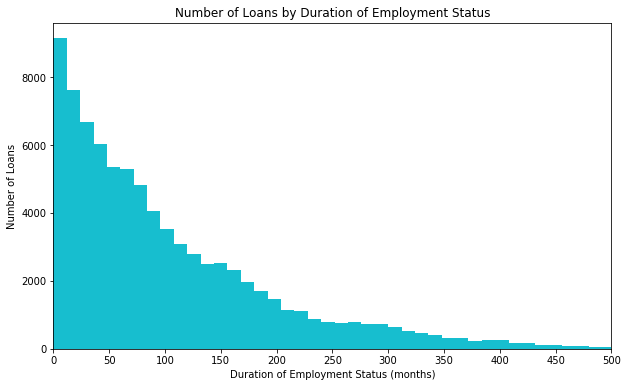

In [191]:
plt.figure(figsize=[10, 6]);
base_color = sb.color_palette()[9]
bin_edges = np.arange(0, df['EmploymentStatusDuration'].max()+12, 12)
plt.hist(df['EmploymentStatusDuration'], bins=bin_edges, color = base_color);
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
plt.xticks(x_ticks, x_ticks);
plt.xlim(0,500)
plt.xlabel('Duration of Employment Status (months)');
plt.ylabel('Number of Loans');
plt.title('Number of Loans by Duration of Employment Status');

#### Although this graph shows an exponential reduction in the number of loans as the duration of the employment status, we will need to also see this for various employment statuses.

> Histogram by Loan term

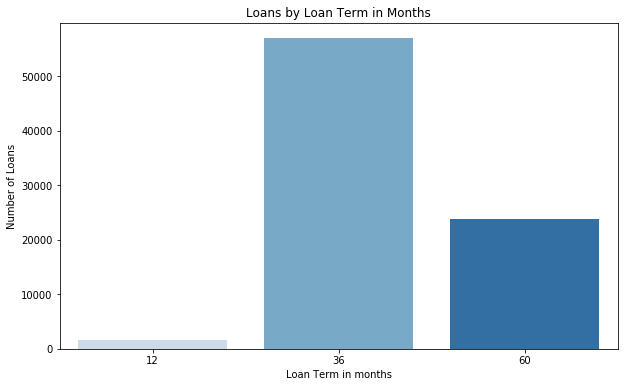

In [194]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'Term', palette = 'Blues');
plt.xlabel('Loan Term in months');
plt.ylabel('Number of Loans')
plt.title('Loans by Loan Term in Months');

#### The most popular loan term is 36 months followed by 60 months.

> Plot to see the distribution of the stated Monthly Income of Borrowers at the time of listing of the loans (limiting the monthly income to $10,000 to ignore outliers)

In [195]:
df['StatedMonthlyIncome'].describe()

count    8.238700e+04
mean     5.871546e+03
std      8.291123e+03
min      0.000000e+00
25%      3.416667e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

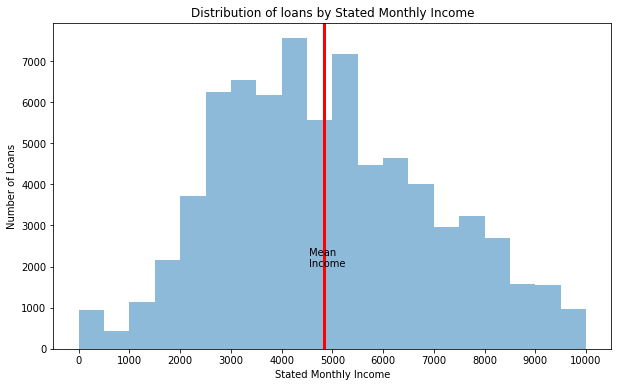

In [210]:
income_mean = np.mean(df[(df['StatedMonthlyIncome']<10000)].StatedMonthlyIncome)
plt.figure(figsize=[10, 6]);
plt.hist(df[(df['StatedMonthlyIncome']<10000)].StatedMonthlyIncome,bins=20, alpha=0.5);
x_ticks = [i for i in range(0,11000,1000)]
plt.xticks(x_ticks);
plt.axvline(x=income_mean, color = 'red', linewidth=3, label='Mean Income'); # where the mean income falls on the distribution
plt.text(income_mean-300, 2000,'Mean\nIncome')
plt.xlabel('Stated Monthly Income');
plt.ylabel('Number of Loans');
plt.title('Distribution of loans by Stated Monthly Income');

#### The distribution of loans by the stated montly income is slightly right skewed.

> Plot to see the distribution of the stated Monthly Income of Borrowers at the time of listing of the loans by loan status

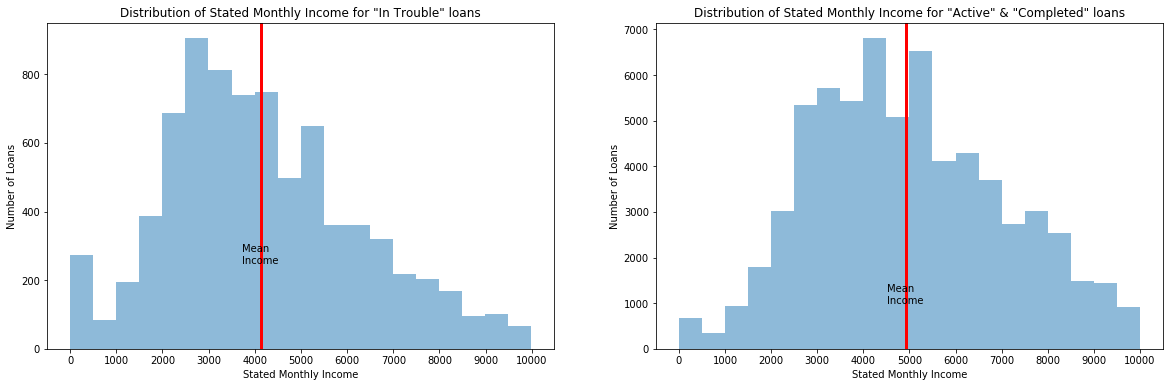

In [212]:
plt.figure(figsize = [20, 6])

# left plot: "In Trouble" Loans
plt.subplot(1, 2, 1)

income_mean_t = np.mean(df[(df['StatedMonthlyIncome']<10000) & 
                         (df['loan_status_cond'].isin(['Delinquent','Chargedoff','Defaulted']))].StatedMonthlyIncome)
ax1 = plt.hist(df[(df['StatedMonthlyIncome']<10000) & (df['loan_status_cond'].isin(['Delinquent','Chargedoff','Defaulted']))].StatedMonthlyIncome,bins=20, alpha=0.5);
x_ticks = [i for i in range(0,11000,1000)]
plt.xticks(x_ticks);
plt.axvline(x=income_mean_t, color = 'red', linewidth=3, label='Mean Income'); # where the mean income falls on the distribution
plt.text(income_mean_t-400,250,'Mean\nIncome')
plt.xlabel('Stated Monthly Income');
plt.ylabel('Number of Loans');
plt.title('Distribution of Stated Monthly Income for "In Trouble" loans');
# right plot: "Active" & "Completed" Loans
plt.subplot(1, 2, 2)

income_mean_g = np.mean(df[(df['StatedMonthlyIncome']<10000) & 
                         (~df['loan_status_cond'].isin(['Delinquent','Chargedoff','Defaulted']))].StatedMonthlyIncome)
ax2 = plt.hist(df[(df['StatedMonthlyIncome']<10000) & (~df['loan_status_cond'].isin(['Delinquent','Chargedoff','Defaulted']))].StatedMonthlyIncome,bins=20, alpha=0.5);
x_ticks = [i for i in range(0,11000,1000)]
plt.xticks(x_ticks);
plt.axvline(x=income_mean_g, color = 'red', linewidth=3, label='Mean Income'); # where the mean income falls on the distribution
plt.text(income_mean_g-400,1000,'Mean\nIncome')
plt.xlabel('Stated Monthly Income');
plt.ylabel('Number of Loans');
plt.title('Distribution of Stated Monthly Income for "Active" & "Completed" loans');

#### As these 2 bar charts suggest, the average Stated Monthly Income for "In Trouble" loans is lower than the average Stated Monthly Income for "Active" and "Completed" loans.

> Now let's look at the Borrower rate.

In [213]:
df['BorrowerRate'].describe()

count    82387.000000
mean         0.198292
std          0.073951
min          0.040000
25%          0.139900
50%          0.189900
75%          0.259900
max          0.360000
Name: BorrowerRate, dtype: float64

> Plotting a histogram for Borrower Rate

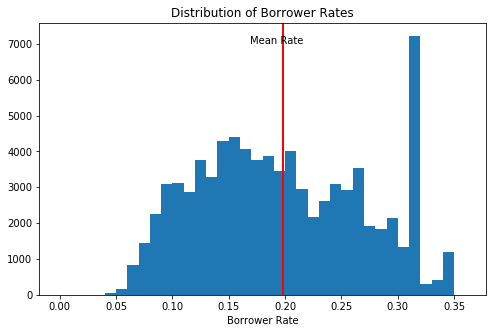

In [214]:
rate_mean = df['BorrowerRate'].mean()
plt.figure(figsize=[8, 5]);
#base_color = sb.color_palette()[0]
bin_edges = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(df['BorrowerRate'], bins=bin_edges);
plt.xlabel('Borrower Rate');
plt.axvline(x=rate_mean, color = 'red', linewidth=2, label='Mean'); # where the mean rate falls on the distribution
plt.text(rate_mean-0.029, 7000, 'Mean Rate');
plt.title('Distribution of Borrower Rates');

#### The histogram of the rates shows a mode close to the top of the range of rates.

## Bivariate Exploration

> Let's plot Borrower rate vs Credit Scores.

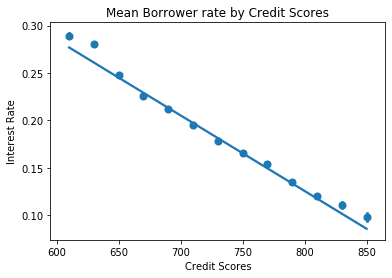

In [216]:
#Borrower rate vs Credit Scores.
sb.regplot(data = df, x = 'creditScore_calculated', y='BorrowerRate',  x_estimator=np.mean);
plt.xlabel('Credit Scores');
plt.ylabel('Interest Rate');
plt.title('Mean Borrower rate by Credit Scores');

#### As expected the mean Interest Rate paid by the borrower on a loan is inversely proportional to the credit scores of the borrower.

> Let's plot Borrower rate by Prosper Scores.

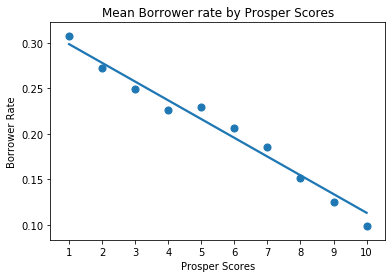

In [218]:
#Borrower rate vs Prosper Scores.
sb.regplot(data = df, x = 'ProsperScore', y='BorrowerRate',  x_estimator=np.mean);
plt.xlabel('Prosper Scores');
plt.ylabel('Borrower Rate');
x_ticks = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x_ticks);
plt.title('Mean Borrower rate by Prosper Scores');

#### As expected the mean Interest Rate paid by the borrower on a loan is inversely proportional to the Prosper Score.

> Now let's plot a Violin Plot & Box Plot for Borrower rate vs Employment Status at the time of the listing of the loan.

In [219]:
df['EmploymentStatus'].value_counts()

Employed         65124
Full-time         7882
Self-employed     4405
Other             3706
Not employed       649
Retired            365
Part-time          256
Name: EmploymentStatus, dtype: int64

In [221]:
#Checking to see if any rows have null values for employment status
df['EmploymentStatus'].isnull().sum()

0

In [222]:
#Update null values to "Not available"
#df['EmploymentStatus'].fillna(value='Not available', inplace=True)

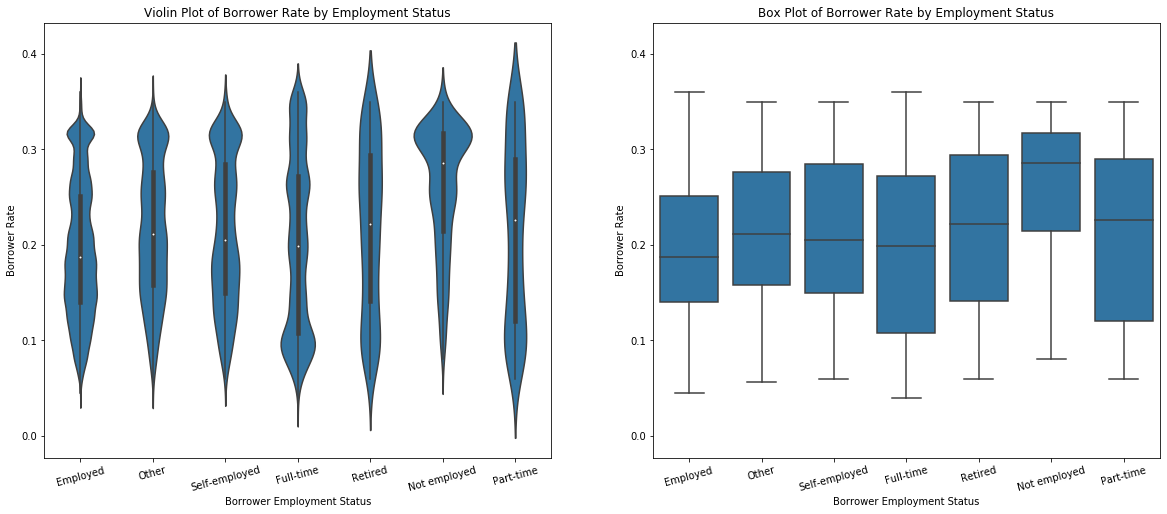

In [224]:
#Employment Status vs Borrower Rate
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color=base_color);
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Rate');
plt.title('Violin Plot of Borrower Rate by Employment Status');

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=15);
plt.xlabel('Borrower Employment Status');
plt.ylabel('Borrower Rate');
plt.title('Box Plot of Borrower Rate by Employment Status');

#### As evident from the plots above, those who are employed pay a lower interest than those unemployed.

> Plot loans by Income Range and loan condition using stacked bar chart

In [227]:
df['IncomeRange'].value_counts()

$50,000-74,999    24944
$25,000-49,999    23780
$100,000+         14335
$75,000-99,999    14023
$1-24,999          4611
Not employed        649
Name: IncomeRange, dtype: int64

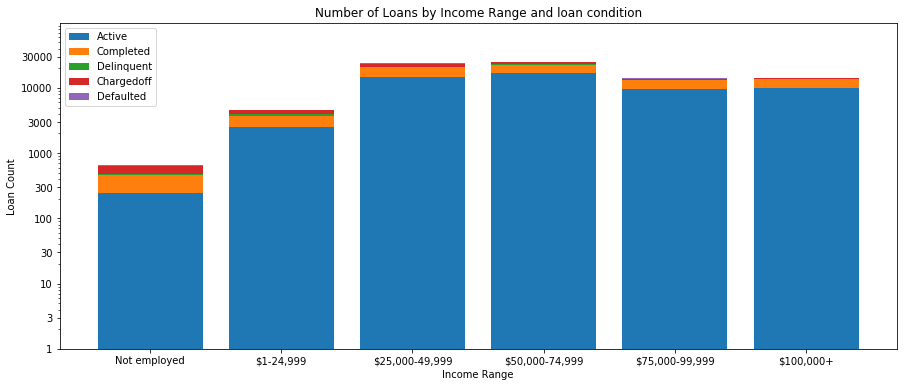

In [243]:
cat1_order = ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
              '$75,000-99,999', '$100,000+']
cat2_order = ['Active','Completed','Delinquent','Chargedoff','Defaulted']

listings_by_income = df.groupby(df['IncomeRange'])['ListingNumber'].count()

plt.figure(figsize = [15, 6])

plt.subplot(1, 1, 1)

baselines = np.zeros(len(cat1_order))

for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    inner_counts = df[df['loan_status_cond'] == cat2]['IncomeRange'].value_counts()
    for r in cat1_order:
        if r in inner_counts.index:
            continue
        else:
            inner_counts[r] = 0
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines);
    baselines += inner_counts[cat1_order]

plt.yscale('log');
plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.xlabel('Income Range');
plt.ylabel('Loan Count');
plt.ylim(1,100000);
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.yticks(y_ticks, y_ticks);
plt.title('Number of Loans by Income Range and loan condition');
plt.legend(cat2_order);

#### As the stacked bar graph suggests, there are proportionally more "In Trouble" loans in the lower income ranges as well as for those loans where the borrower is unemployed.

> Let's plot the distribution of "In Trouble" ('Chargedoff', 'Delinquent' and 'Defaulted') loans by the categories for which the loans were taken out.

In [245]:
listingcategory = pd.Series(['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'])

In [246]:
listingcategory_val = df[df['loan_status_cond'].isin(['Delinquent','Chargedoff','Defaulted'])].groupby(df['ListingCategory (numeric)'])['ListingNumber'].count()
total = df[df['loan_status_cond'].isin(['Delinquent','Chargedoff','Defaulted'])]['ListingNumber'].count()
listingcategory_val.sort_values(inplace=True)
listingcategory_sorted = [listingcategory[i] for i in listingcategory_val.index]

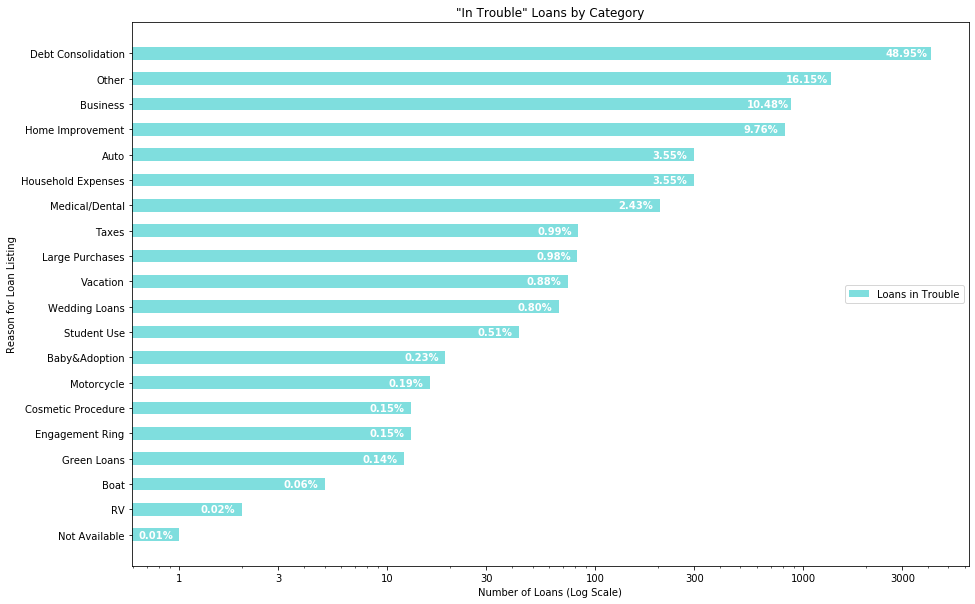

In [261]:
# "In Trouble" loans by Loan Category
height = 0.5
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
plt.xscale('log');
x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.xticks(x_ticks, x_ticks);
plt.ylabel('Reason for Loan Listing');
plt.xlabel('Number of Loans (Log Scale)');
rects = ax.barh(listingcategory_sorted, listingcategory_val.values, height, color='c', label='Loans in Trouble', alpha=0.5);

rects = ax.patches
texts = ['{:0.2f}%'.format(100*listingcategory_val[i]/total) for i in listingcategory_val.index]

for rect, text in zip(rects, texts):
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width/1.3, rect.get_y()+rect.get_height()/2, text, color='white', fontweight='bold', ha='center', va='center')

plt.title('"In Trouble" Loans by Category');
plt.legend(loc='center right');
plt.show()

#### The graph suggests that about half of the loans that are "In Trouble" were taken out for "Debt Consolidation".

> Plotting Violin and Box Plots for Borrower Rate by Homeownership status of the Borrower

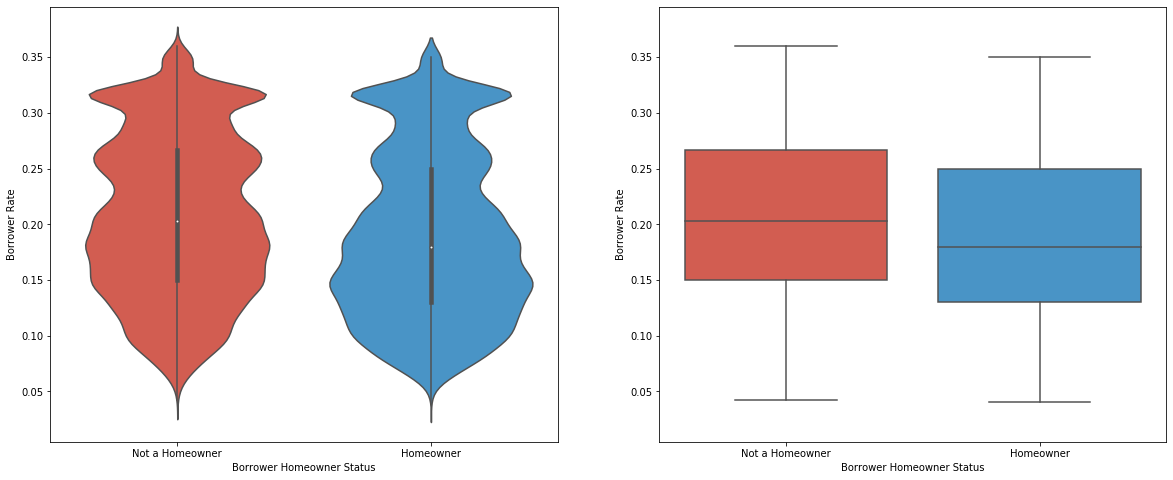

In [253]:
#Violin Plot for Borrower Rate by Homeowner status
plt.figure(figsize = [20, 8])
#base_color = sb.color_palette()[0]
flatui = ["#e74c3c", "#3498db"]
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerRate', palette=flatui);
plt.xticks([0,1], ['Not a Homeowner', 'Homeowner']);
plt.xlabel('Borrower Homeowner Status');
plt.ylabel('Borrower Rate');

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerRate', palette=flatui)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks([0,1], ['Not a Homeowner', 'Homeowner']);
plt.xlabel('Borrower Homeowner Status');
plt.ylabel('Borrower Rate');

> The data suggests that on average being a homeowner will get the borrower a lower Interest Rate for a loan.

#### Plotting a FacetGrid for looking at the trend in the number of loans made for the various employment status durations by the different employment statuses.

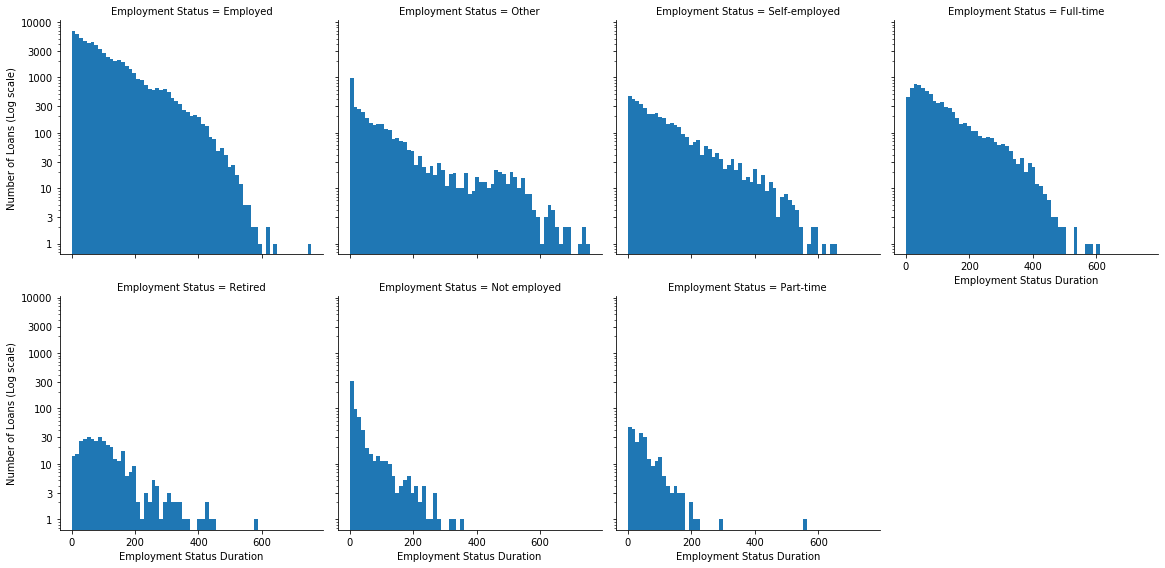

In [265]:
bin_edges = np.arange(0, df['EmploymentStatusDuration'].max()+12, 12)
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', col_wrap = 4, height = 4)
g.map(plt.hist, "EmploymentStatusDuration", bins = bin_edges);
plt.yscale('log');
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.yticks(y_ticks, y_ticks);
g.set_titles('Employment Status = {col_name}');
g.set_axis_labels('Employment Status Duration', 'Number of Loans (Log scale)');

#### As we can see in the Facet Grid above the number of loans made reduce exponentially as the duration of the employment status increases for almost all the employment statuses.

> Bar plot for is Borrower a Homeowner based on the Term of the Loan.

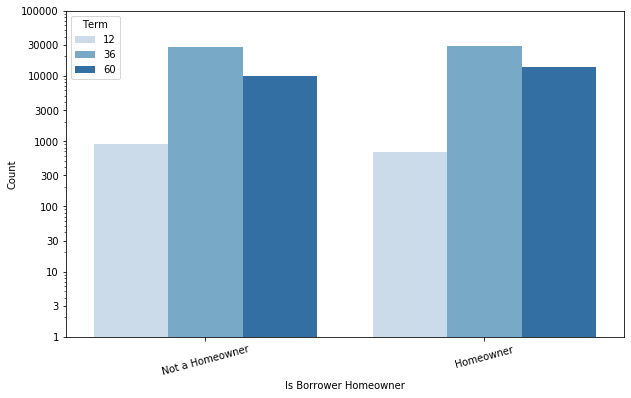

In [269]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'IsBorrowerHomeowner', hue='Term', palette = 'Blues');
plt.yscale('log');
y_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.yticks(y_ticks, y_ticks);
plt.xticks([0,1], ['Not a Homeowner', 'Homeowner'], rotation=15)
plt.ylabel('Count');
plt.xlabel('Is Borrower Homeowner');

#### The above chart doesn't show any appreciable variations for Homeownership status and loan terms.

## Multivariate Exploration

> Plotting average Borrower Rate for Prosper Scores across all Income Ranges by Homeownership status.

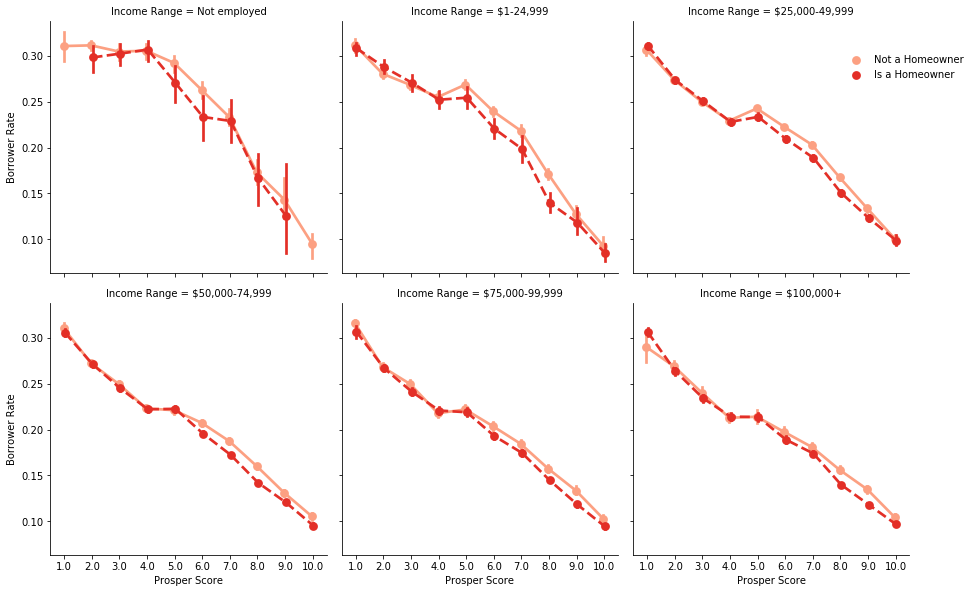

In [273]:
g = sb.catplot(x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', col = 'IncomeRange',
               data = df, kind="point", col_wrap = 3,  height = 4, dodge=True,  
               palette = 'Reds', linestyles = ['-', '--'], legend=False, legend_out=True);
g.set_titles('Income Range = {col_name}');
g.set_axis_labels('Prosper Score', 'Borrower Rate')
g.add_legend(loc='upper right', bbox_to_anchor=(1.05, 0.95));
leg = g._legend
new_labels = ['Not a Homeowner', 'Is a Homeowner']
leg.set_title('');
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
g.fig.subplots_adjust(top=1,right=0.99);
plt.show()   

#### We observe that the Borrower Rate is consistently lower for Homeowners than non-Homeowners, especially at Prosper Scores of 5 & greater. For Unemployed borrowers, the error bars in the chart show more uncertainty around the estimate of the average Borrower Rate.

> Plotting average Borrower Rate for Prosper Scores across all Income Ranges by Income Verifiability

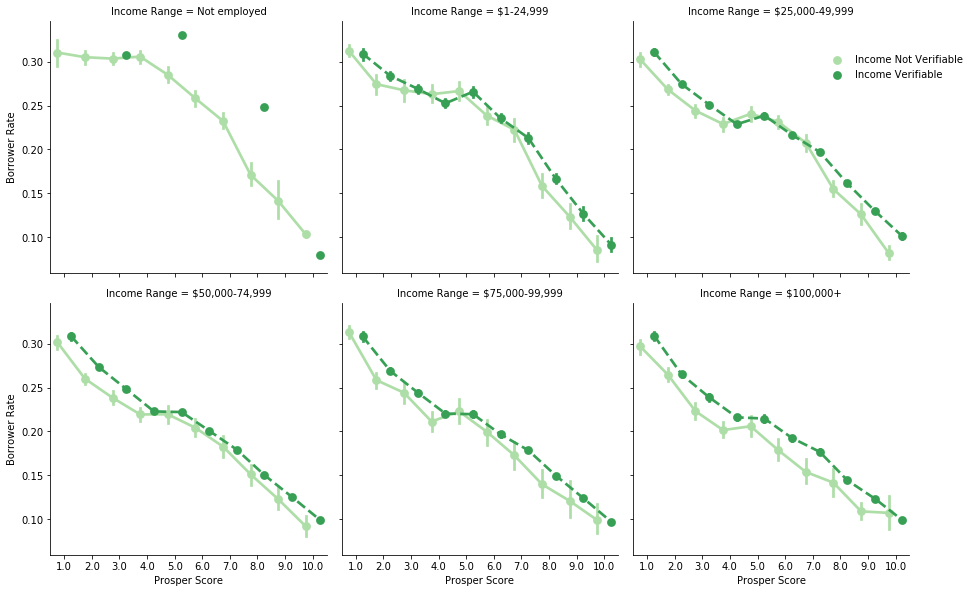

In [275]:
g = sb.catplot(x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeVerifiable', col = 'IncomeRange',
               data = df, kind="point", col_wrap = 3,  height = 4, aspect=1, dodge=0.5,  
               palette = 'Greens', linestyles = ['-', '--'], legend=False, legend_out=True);
g.set_titles('Income Range = {col_name}');
g.set_axis_labels('Prosper Score', 'Borrower Rate');
g.add_legend(loc='upper right', bbox_to_anchor=(1.05, 0.95));
leg = g._legend
new_labels = ['Income Not Verifiable', 'Income Verifiable']
leg.set_title('');
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
g.fig.subplots_adjust(top=1,right=0.99);
plt.show() 

#### Surprisingly, the Borrower Rate for almost all Income Ranges and Prosper Scores, is equal to or lower for those borrowers whose income is not verifiable compared to those borrowers whose income is verifiable.

#### A point to note in these charts is that the error bars for the "Income Not Verifiable" category show more uncertainty around the estimate of the central tendency of the average borrower rate. We also observe very few data points in the "Income Verifiable" category of the "Not Employed" Income Range category, which makes sense, because, very few Borrowers will be able to provide proof of verifiable income since they are unemployed.

> From the plots above we see that when plotted for Income Range, the Borrower's homeownership status is a better predictor of the borrower rate than the Borrower's income verifiability. 